In [186]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

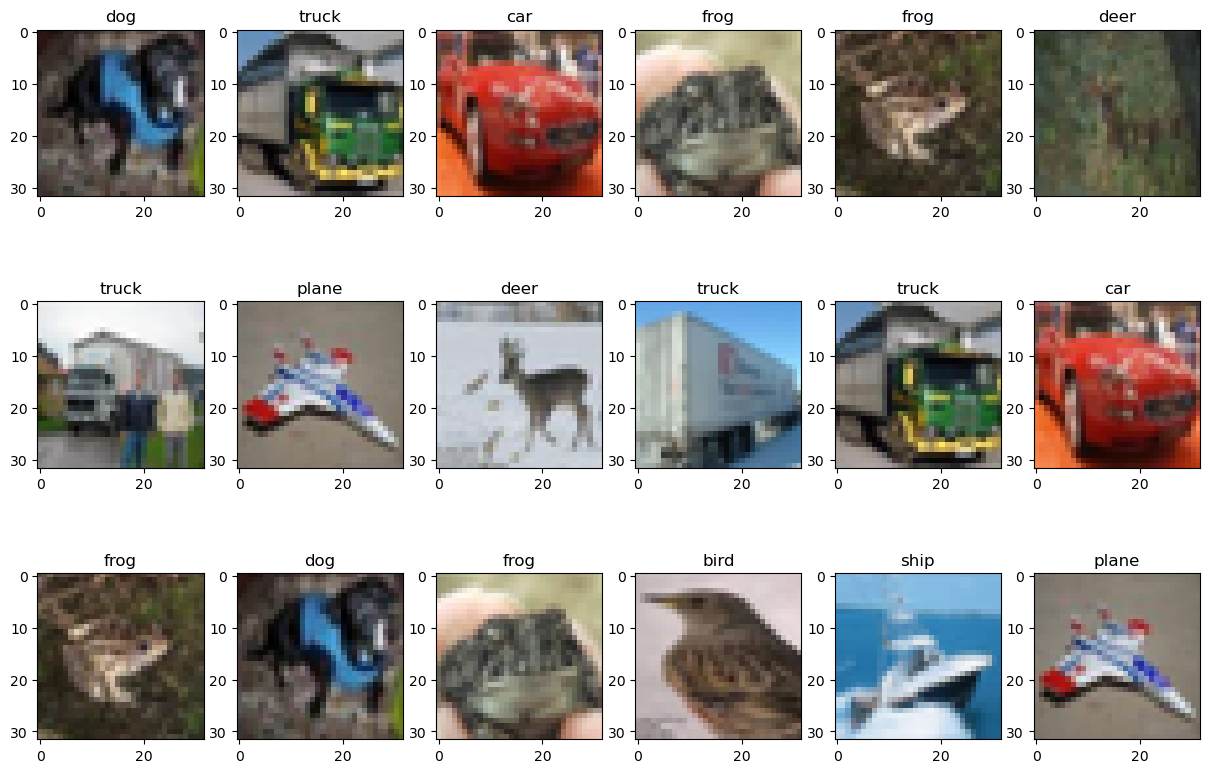

In [187]:
# Step 0
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

(Text(0.5, 0, 'Class'), Text(0, 0.5, 'Amount Of Pictures'))

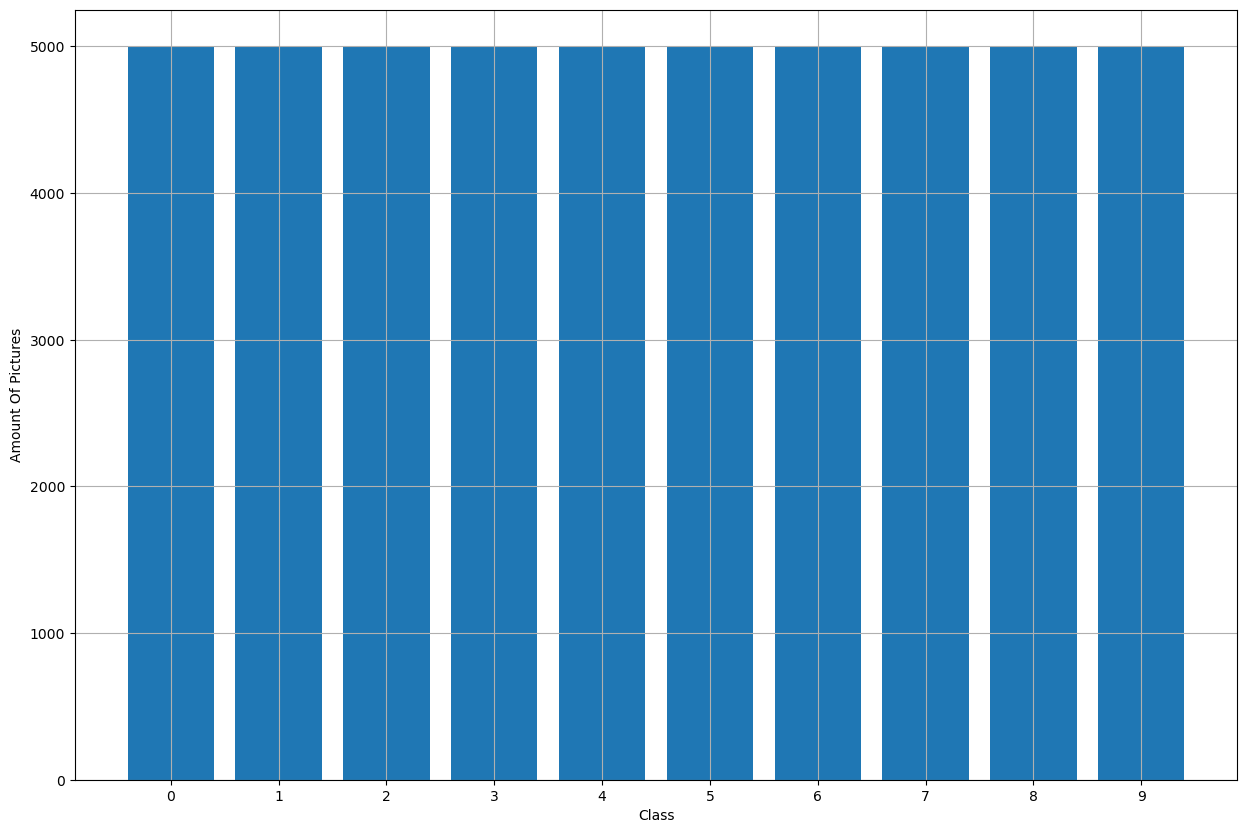

In [188]:
# Compute the class histogram
from collections import Counter
hist = Counter(y_train.flatten())

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xticks(range(0, num_classes))
plt.xlabel('Class'), plt.ylabel('Amount Of Pictures')

In [189]:
import statistics
std = statistics.pstdev(hist.values())
print(std)
# Dataset is perfectly balanced

0.0


In [190]:
# Step 1
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [393]:
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="linear")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 1152)              0  

In [394]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size, epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 7s 18ms/step - loss: 0.0784 - accuracy: 0.3903 - val_loss: 0.0717 - val_accuracy: 0.4920
Epoch 2/25
352/352 [==============================] - 6s 18ms/step - loss: 0.0693 - accuracy: 0.5224 - val_loss: 0.0668 - val_accuracy: 0.5574
Epoch 3/25
352/352 [==============================] - 9s 24ms/step - loss: 0.0657 - accuracy: 0.5692 - val_loss: 0.0636 - val_accuracy: 0.6076
Epoch 4/25
352/352 [==============================] - 7s 20ms/step - loss: 0.0631 - accuracy: 0.5987 - val_loss: 0.0621 - val_accuracy: 0.6240
Epoch 5/25
352/352 [==============================] - 7s 20ms/step - loss: 0.0611 - accuracy: 0.6203 - val_loss: 0.0611 - val_accuracy: 0.6284
Epoch 6/25
352/352 [==============================] - 8s 22ms/step - loss: 0.0600 - accuracy: 0.6343 - val_loss: 0.0594 - val_accuracy: 0.6444
Epoch 7/25
352/352 [==============================] - 11s 30ms/step - loss: 0.0588 - accuracy: 0.6475 - val_loss: 0.0586 - val_accuracy: 0.652

Train Acc      0.7100889086723328
Validation Acc 0.6899999976158142


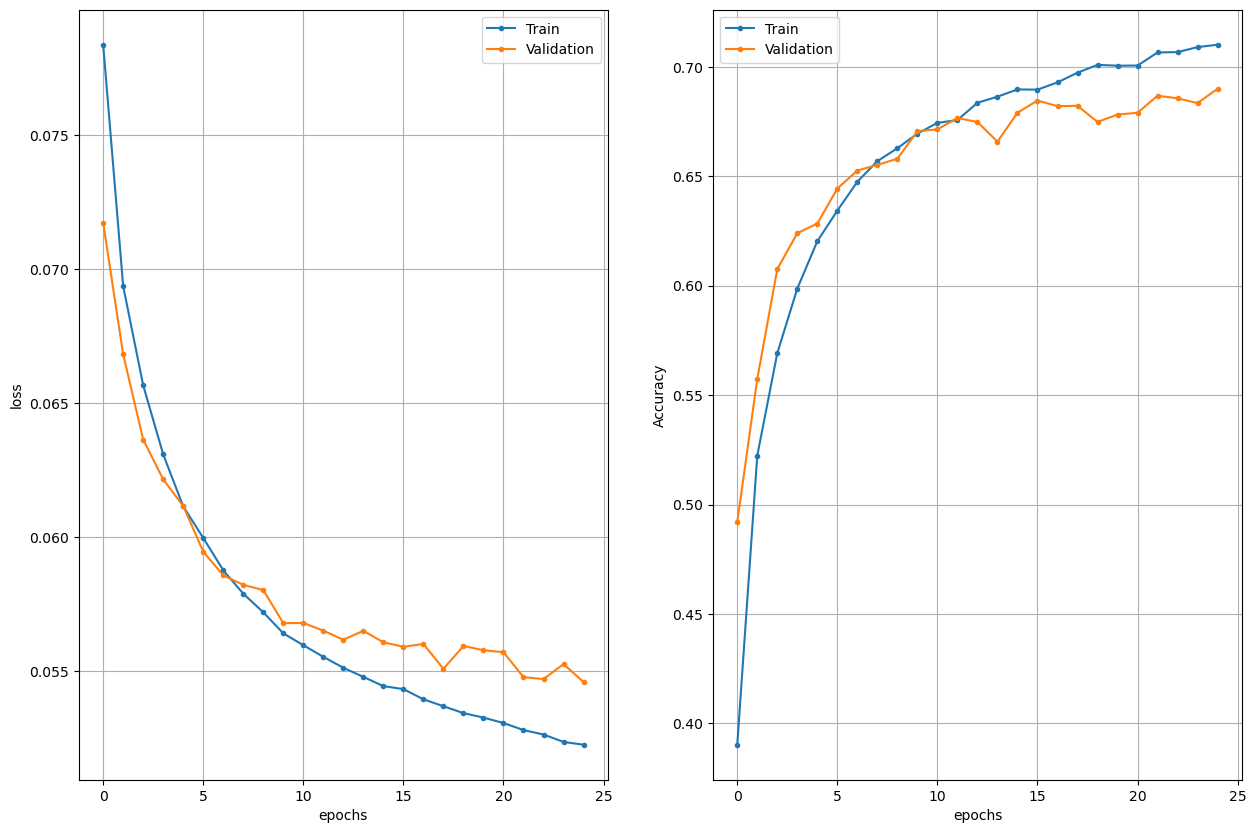

In [395]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])  

In [396]:
# Step 4
# Compute the labels and the predictions as sparse values
# This program makes an array with numbers from 0 to 9 and length 10000
y_true = []
for i in range(0,y_test.shape[0]) :
    y_true.append(np.argmax(y_test[i][:]))

predictions = model.predict(x_test)
y_pred = []
for i in range(0,predictions.shape[0]) :
    y_pred.append(np.argmax(predictions[i][:]))

313/313 [==============================] - 1s 2ms/step


In [397]:
# Compute and print the accuracy for each class
correct = np.zeros(num_classes)
for i in range(0,len(y_true)) :
    if y_pred[i] == y_true[i] :
        correct[y_true[i]]+=1
for class_id, class_name in classes.items():
    acc = correct[class_id]/(len(y_true)/num_classes)
    print(class_name, acc)

plane 0.713
car 0.842
bird 0.517
cat 0.488
deer 0.556
dog 0.654
frog 0.795
horse 0.661
ship 0.79
truck 0.786


In [398]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.6802
Test loss   0.055431969463825226
Test metric 0.6801999807357788


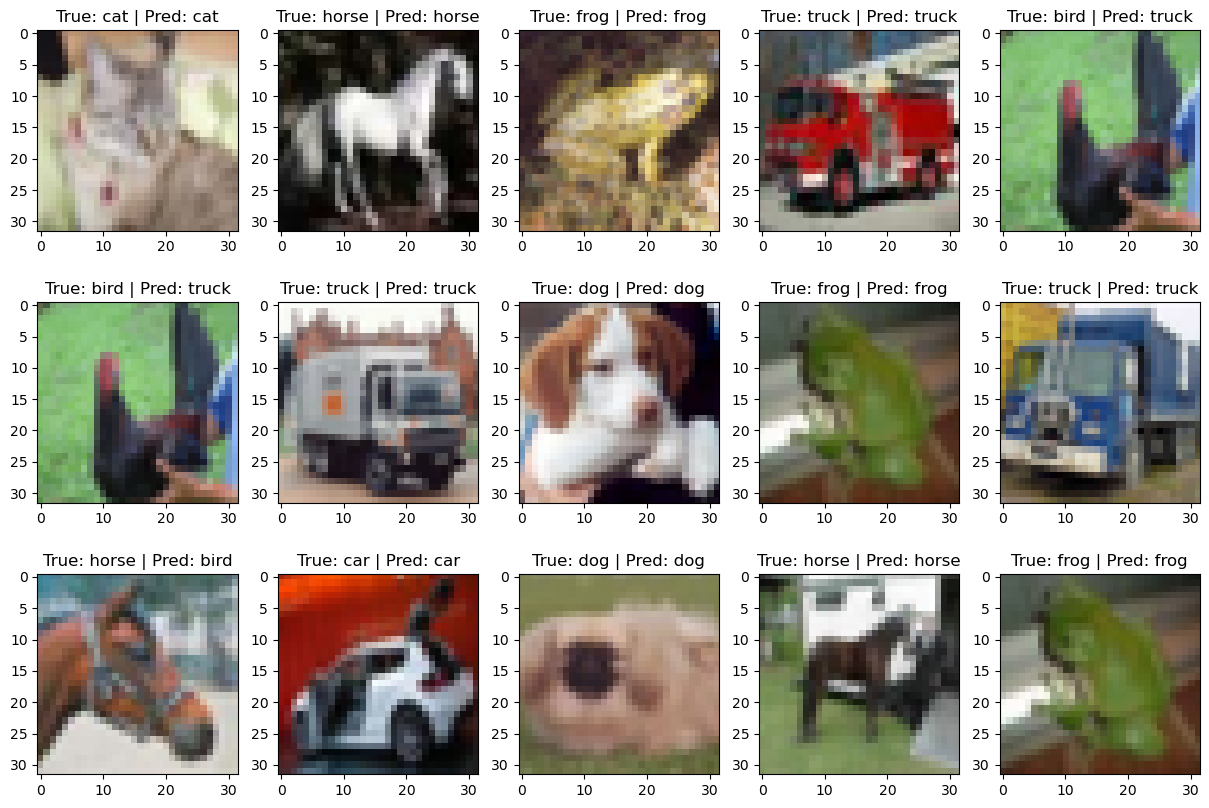

In [399]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

In [401]:
# Questions
# 1) The overall accuracy of the classifier is 68 %
# 2) Increase the amount of neurons, however it would be better if batch size increased too.
# 3) :
inputs = Input(shape=(size, size, 3))

net = Conv2D(64, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="linear")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_68 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 4608)              0  

In [402]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size, epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 38s 106ms/step - loss: 0.0731 - accuracy: 0.4608 - val_loss: 0.0657 - val_accuracy: 0.5592
Epoch 2/25
352/352 [==============================] - 38s 108ms/step - loss: 0.0624 - accuracy: 0.6050 - val_loss: 0.0612 - val_accuracy: 0.6216
Epoch 3/25
352/352 [==============================] - 39s 110ms/step - loss: 0.0576 - accuracy: 0.6537 - val_loss: 0.0563 - val_accuracy: 0.6692
Epoch 4/25
352/352 [==============================] - 39s 111ms/step - loss: 0.0544 - accuracy: 0.6877 - val_loss: 0.0549 - val_accuracy: 0.6818
Epoch 5/25
352/352 [==============================] - 39s 112ms/step - loss: 0.0525 - accuracy: 0.7084 - val_loss: 0.0535 - val_accuracy: 0.6976
Epoch 6/25
352/352 [==============================] - 40s 114ms/step - loss: 0.0509 - accuracy: 0.7252 - val_loss: 0.0538 - val_accuracy: 0.6900
Epoch 7/25
352/352 [==============================] - 40s 113ms/step - loss: 0.0498 - accuracy: 0.7344 - val_loss: 0.0523 - val_ac

Train Acc      0.8327555656433105
Validation Acc 0.7378000020980835


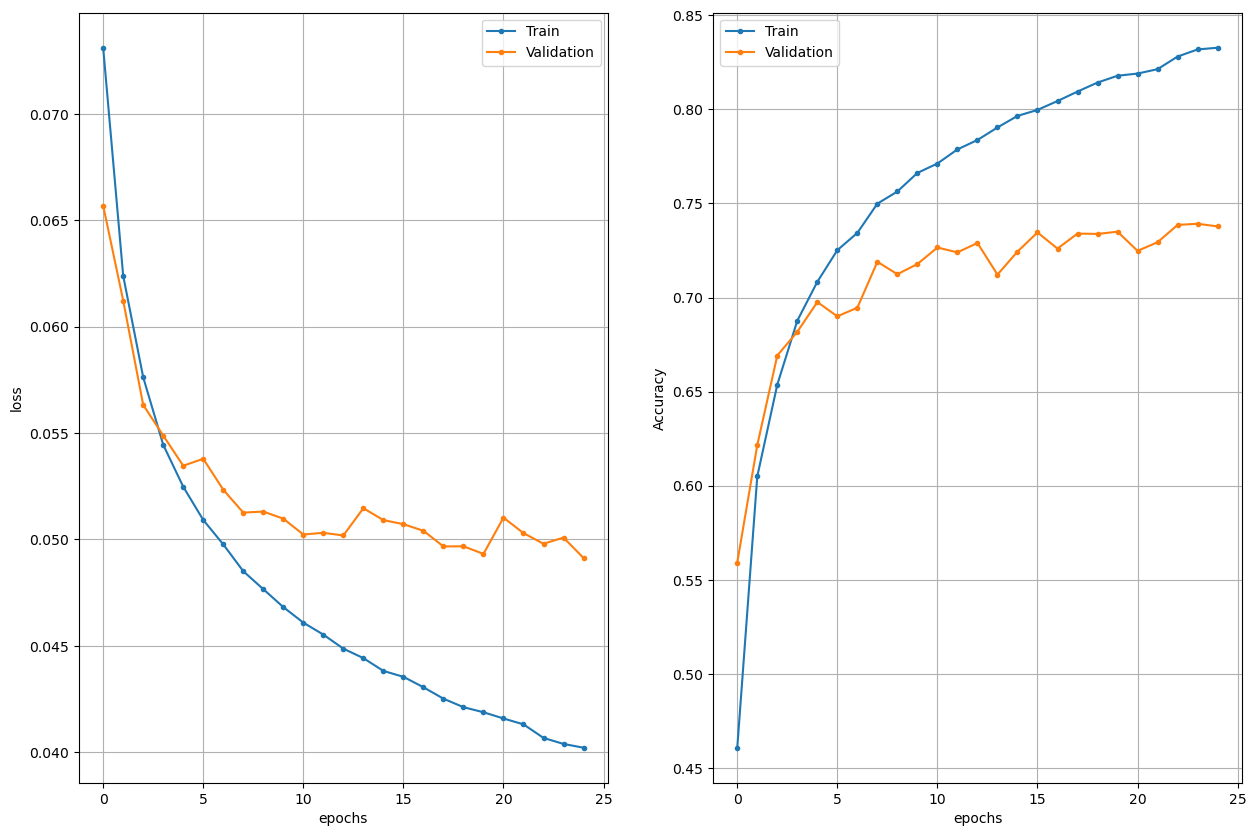

In [403]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1]) 

In [404]:
# Step 4
# Compute the labels and the predictions as sparse values
# This program makes an array with numbers from 0 to 9 and length 10000
y_true = []
for i in range(0,y_test.shape[0]) :
    y_true.append(np.argmax(y_test[i][:]))

predictions = model.predict(x_test)
y_pred = []
for i in range(0,predictions.shape[0]) :
    y_pred.append(np.argmax(predictions[i][:]))

313/313 [==============================] - 9s 28ms/step


In [405]:
# Compute and print the accuracy for each class
correct = np.zeros(num_classes)
for i in range(0,len(y_true)) :
    if y_pred[i] == y_true[i] :
        correct[y_true[i]]+=1
for class_id, class_name in classes.items():
    acc = correct[class_id]/(len(y_true)/num_classes)
    print(class_name, acc)

plane 0.79
car 0.856
bird 0.619
cat 0.545
deer 0.646
dog 0.647
frog 0.815
horse 0.738
ship 0.813
truck 0.805


In [406]:
# Percentage is better, so good so now net recognises cats better than random guess!

In [407]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.0503 - accuracy: 0.7274
Test loss   0.050270240753889084
Test metric 0.727400004863739


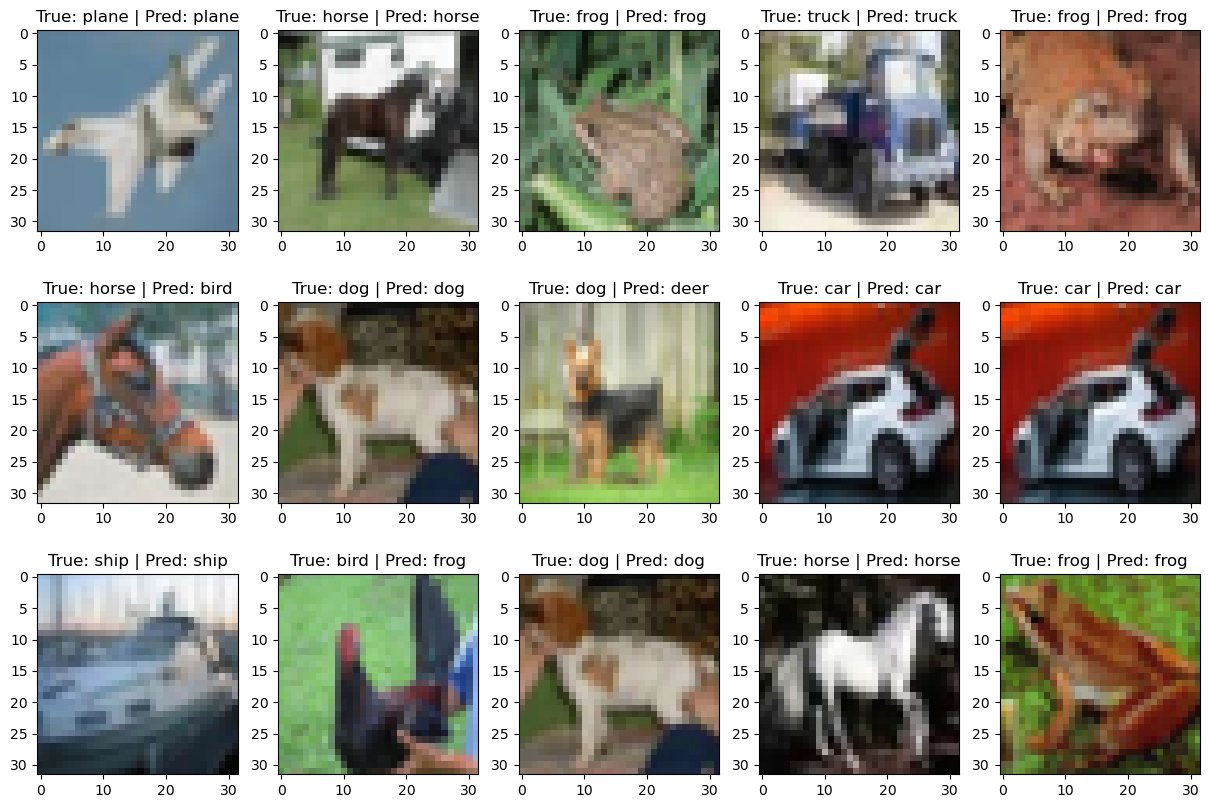

In [408]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

In [ ]:
# Now the overall accuracy of the classifier is 72.7 %.
# To make it better, the net needs : more layers, more neurons, bigger batch size, dropout and other.